<a href="https://colab.research.google.com/github/waquasadnankarimi/Function/blob/main/Boosting_Techniques10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

Answer:

- Boosting in machine learning is an ensemble technique that sequentially combines multiple simple "weak learners" (models slightly better than random guessing) into one powerful "strong learner" by iteratively focusing on the mistakes of previous models, adjusting data point weights to emphasize misclassified samples, thus reducing bias and improving overall accuracy for complex problems.

**How Boosting Works to Improve Weak Learners**
- **Sequential Training**: Unlike bagging, boosting trains models one after another (sequentially), not in parallel.
- **Error Correction Focus:** Each new weak learner (often a shallow decision tree) is trained to correct the errors or residuals (missed predictions) of the combined model from the previous steps.
- **Weight Adjustment:** The algorithm increases the weight (importance) of data points that were misclassified by earlier models, forcing subsequent learners to pay more attention to these difficult examples.
- **Weighted Combination:** The final strong model combines the predictions of all weak learners, often using a weighted majority vote (for classification) or sum (for regression), where better-performing learners have a greater say.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer:
- Both AdaBoost and Gradient Boosting are boosting algorithms, but they differ in how they train new learners and handle errors.

**AdaBoost (Adaptive Boosting)**
- Error Correction: Increases weights of misclassified data points, forcing the next model to focus on them.
- Weak Learners: Typically uses simple decision stumps (trees with one split).
- Model Updates: Assigns weights to classifiers based on performance; stronger learners get higher weights.
- Focus: Adapting the data distribution to focus on difficult samples.

**Gradient Boosting (GBM)**
- Error Correction: Trains new models (trees) to predict the residuals (errors) of the previous model, moving in the direction of the steepest descent (gradient) of the loss function.
- Weak Learners: Can use more complex learners, often deeper decision trees.
- Model Updates: Uses a learning rate (shrinkage) to control the contribution of each tree, allowing for smaller, more stable updates.
- Focus: Minimizing a specific, differentiable loss function (like squared error or log loss).

**Key Difference Summary**
- How Errors Are Handled: AdaBoost adjusts sample weights; Gradient Boosting adjusts model predictions by fitting residuals.
- Model Complexity: AdaBoost uses simple stumps; Gradient Boosting often uses deeper trees.
- Sensitivity: AdaBoost is more sensitive to noise; Gradient Boosting's learning rate makes it more robust to outliers.

Question 3: How does regularization help in XGBoost?

Answer:
- Regularization in XGBoost acts as a crucial "inner voice of restraint" that prevents the model from becoming too complex and over-fitting to the training data.

**XGBoost includes two types of regularization:**

1. L1 Regularization (Lasso)
  - Adds a penalty for the number of leaf nodes and feature weights
  - Encourages sparsity (pushes small weights to zero)
  - Helps remove irrelevant features automatically
2. L2 Regularization (Ridge)
  - Adds penalty for large leaf weights
  - Smooths the model and reduces variance

**How it Improves the Model**

Regularization in XGBoost:
-  Prevents the model from growing too deep or complex
-  Reduces variance and overfitting
- Makes the predictions more stable
- Helps handle noisy datasets better

**Additional Controls**

XGBoost also uses structural regularization parameters like:
  - max_depth
  - min_child_weight
  - gamma
  - subsample
  - colsample_bytree

Question 4: Why is CatBoost considered efficient for handling categorical data?

Answer:
- CatBoost is considered efficient for handling categorical data because it uses built-in encoding techniques that transform categorical features into numerical values without requiring manual preprocessing such as one-hot encoding or label encoding.

**Key reasons for its efficiency include:**
- Ordered Target Encoding: Instead of using the entire dataset to calculate statistics for encoding (which causes data leakage), CatBoost sorts data randomly and computes category statistics based only on historical observations (past rows). This technique, called Ordered Target Statistics, generates numerical representations that prevent "target leakage" and "prediction shift".
- Native Handling of Categorical Features: CatBoost does not require preprocessing steps like one-hot encoding or label encoding. Users can simply designate categorical columns, and the algorithm handles them directly, which saves time, reduces memory usage, and prevents the creation of sparse, high-dimensional matrices.
- Handling High-Cardinality Data: CatBoost is particularly effective at managing categorical features with many unique values (high cardinality), such as user IDs or product codes, by learning efficient numerical representations during training.
- Symmetric (Oblivious) Trees: CatBoost uses symmetric trees, where all nodes at the same depth split on the same feature and threshold. This structure acts as a regularizer, reduces overfitting, and allows for faster training and prediction, especially on GPUs.
- Combination of Categorical Features: CatBoost automatically creates combinations of categorical features to capture complex interactions, improving accuracy.
- Automatic Handling of Missing Values: CatBoost treats missing values as a separate category, allowing the model to learn from them rather than requiring imputation.

Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

Answer:
- Boosting techniques are often preferred in applications where high accuracy, fine-grained prediction, and handling complex patterns are important. Boosting reduces bias and works well with tabular/structured data, which makes it popular in many domain-specific machine learning tasks.

**Real-World Applications**
 **Fraud Detection (Banking & Finance)**
- Boosting (e.g., XGBoost, LightGBM) is widely used for:
  - Credit card fraud detection
  - Insurance fraud Because it captures subtle patterns and interactions that bagging methods may miss.

 **Credit Scoring & Risk Modeling**
- Banks use boosting models to predict:
  - Loan defaults
  - Creditworthiness
  - Boosting provides higher precision and interpretability than bagging models like Random Forests.

 **Online Advertising & Click-Through-Rate (CTR) Predic**tion **bold text**
- Boosting is used for:
  - CTR prediction
  - Ad ranking
  - Conversion probability Due to its ability to model nonlinear relationships in sparse featur

 **Medical Diagnosis & Disease Prediction**
- Boosting models are used for:
  - Cancer risk classification
  - Early diagnosis
    Because they improve performance on imbalanced and noisy medical datasets.

**Customer Churn Prediction**
- Telecom and SaaS companies use boosting to detect which customers are likely to leave, where small improvements in accuracy matter commercially.

 **Competition & Kaggle-Type Machine Learning**
- Boosting dominates many Kaggle competitions involving tabular datasets because it:
  -  yields high accuracy
  -  handles missing values
  - works well with categorical and numerical data

**Ranking Problems (Search Engines)**

- Search engines like Yandex and Bing have used boosting for:
  - Document ranking
  - Query scoring

 **Why Boosting Over Bagging?**

| Reason                     | Explanation                               |
| -------------------------- | ----------------------------------------- |
| Reduces Bias               | Learns complex patterns sequentially      |
| Better for Structured Data | Common in finance, healthcare, marketing  |
| Handles Imbalanced Data    | Reweights misclassified samples           |
| Higher Accuracy            | Performs better when accuracy is critical |



In [1]:
'''
Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Model Accuracy:", accuracy)


AdaBoost Model Accuracy: 0.9736842105263158


In [2]:
'''
Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
'''
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Gradient Boosting R² Score:", r2)


Gradient Boosting R² Score: 0.8004451261281281


In [3]:
'''
Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.05}
Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:39:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


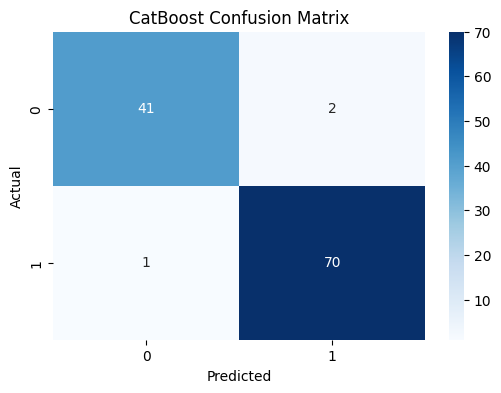

In [6]:
'''
Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
'''
!pip install catboost
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

**Describe your step-by-step data science pipeline using boosting techniques:**
- Data preprocessing & handling missing/categorical values
- Choice between AdaBoost, XGBoost, or CatBoost
- Hyperparameter tuning strategy
- Evaluation metrics you'd choose and why
- How the business would benefit from your model

**Data Preprocessing & Handling Missing/Categorical Values**
- Missing Values: Use advanced imputation like KNNImputer (for mixed types) or IterativeImputer (MICE) for numeric, and Mode Imputation/Category Encoding for categorical features.
- Categorical Features: Apply One-Hot Encoding for low-cardinality features or Target Encoding (with smoothing) for high-cardinality features to avoid dimension explosion and preserve information.
- Feature Scaling: Scale numeric features using StandardScaler or MinMaxScaler.
- Feature Engineering: Create relevant features like Debt-to-Income Ratio (DTI) or Loan-to-Value (LTV).
- Handling Imbalance: Use SMOTE (Synthetic Minority Over-sampling Technique) on training data only, or adjust class weights in the model.

**Choice Between AdaBoost, XGBoost, CatBoost**
- XGBoost: Excellent performance, handles missing values internally, often a strong baseline.
- CatBoost: Superior for categorical features (handles them natively without manual encoding), generally robust.
- AdaBoost: Simpler, but may struggle with noisy data/outliers compared to XGBoost/CatBoost.
- Choice: Start with XGBoost or CatBoost due to built-in handling of mixed data types and high performance; CatBoost is ideal if many categorical features exist.

**Hyperparameter Tuning Strategy**
- Method: Use RandomizedSearchCV or Bayesian Optimization (e.g., Hyperopt, Optuna) for efficiency over Grid Search.
- Key Parameters:
  - n_estimators (boosting rounds)
  - learning_rate (shrinkage)
  - max_depth, min_child_weight (complexity control)
  - subsample, colsample_bytree (regularization)
  - scale_pos_weight (for imbalance).

**4. Evaluation Metrics**
- Area Under the Precision-Recall Curve (AUC-PR): Best for imbalanced datasets, focuses on performance of the minority (default) class.
- Recall (Sensitivity): How many actual defaults are caught (minimizes false negatives).
- Precision: Of predicted defaults, how many are correct (minimizes false positives, less costly).
- F1-Score: Harmonic mean of Precision & Recall.

**Business Benefit**
- Risk Mitigation: Identify high-risk applicants early, reducing loan defaults and financial losses.
- Profit Optimization: Approve more good loans while denying risky ones, increasing portfolio quality.
- Dynamic Pricing: Offer personalized interest rates based on predicted risk.
- Operational Efficiency: Automate loan approvals for low-risk applicants.

In [9]:

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

np.random.seed(42)
num_samples = 1000

data = {
    'age': np.random.randint(20, 65, num_samples),
    'income': np.random.normal(50000, 15000, num_samples).astype(int),
    'loan_amount': np.random.normal(10000, 5000, num_samples).astype(int),
    'credit_score': np.random.randint(300, 850, num_samples),
    'education': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], num_samples),
    'employment_status': np.random.choice(['Employed', 'Unemployed', 'Self-Employed'], num_samples),
    'loan_type': np.random.choice(['Personal', 'Mortgage', 'Auto'], num_samples),
    'default': np.random.choice([0, 1], num_samples, p=[0.85, 0.15])
}

df = pd.DataFrame(data)

for col in ['income', 'credit_score', 'education']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

target = "default"
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()


if target in numeric_cols:
    numeric_cols.remove(target)

for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].astype(str).replace('nan', 'NaN')

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=[target]),
    df[target],
    test_size=0.2,
    stratify=df[target],
    random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=categorical_cols)
test_pool = Pool(X_test, y_test, cat_features=categorical_cols)

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function='Logloss',
    eval_metric='AUC',
    class_weights=[1, 5],
    verbose=False,
    random_seed=42
)

model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=60)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


ROC-AUC Score: 0.5672514619883041

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       171
           1       0.17      0.10      0.13        29

    accuracy                           0.80       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.76      0.80      0.77       200

